In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

raw = pd.read_csv('Backtest.csv')

df = raw.T
df.columns = df.iloc[0]
df = df[1:]
df.reset_index(drop=True, inplace=True)
df.rename

# Convert the numeric columns to float
numeric_columns = ['PnL', 'Fitness', 'TR', 'std(RR)', 'MDD', 'Win Rate', 'nTrade']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

strategy_mapping = {
    '0.002': 'STS1',
    '0.004': 'STS2',
    '0.005': 'STS3',
    '0.008': 'STS4'
}

data = df[df['Currency']=='USDCAD'].copy()

for threshold, strategy in strategy_mapping.items():
    data.loc[data['Threshold'] == threshold, 'Strategy'] = strategy

avg_dict = dict()
        
def update_strategy_dict(df, strategy_dict):
    for strategy in df['Strategy'].unique():
        sub_df = df[df['Strategy']==strategy]
        strategy_dict.update({
            strategy: [
                np.mean(sub_df['PnL']), np.mean(sub_df['Fitness']),
                np.mean(sub_df['TR']), np.mean(sub_df['std(RR)']),
                np.mean(sub_df['MDD']), np.mean(sub_df['Win Rate']),
                np.mean(sub_df['nTrade'])
            ]
        })

update_strategy_dict(data, avg_dict)

avgdf = pd.DataFrame(avg_dict)
avgdf['Index'] = ['PnL','Fitness','TR','std(RR)','MDD','Win Rate','nTrade']
avgdf.set_index('Index', inplace=True)

In [34]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for 'TR', 'MDD', and 'Win Rate' columns for each strategy
selected_cols = ['TR', 'MDD', 'Win Rate']
strategies_USDCAD = data['Strategy'].unique()
skew_kurt_strategy_USDCAD = pd.DataFrame(columns=['Strategy', 'Column', 'Skewness', 'Kurtosis'])
for strategy in strategies_USDCAD:
    strategy_data = data[data['Strategy'] == strategy]
    for col in selected_cols:
        skew_val = skew(strategy_data[col].dropna())
        kurt_val = kurtosis(strategy_data[col].dropna())
        skew_kurt_strategy_USDCAD = skew_kurt_strategy_USDCAD.append({
            'Strategy': strategy,
            'Column': col,
            'Skewness': skew_val,
            'Kurtosis': kurt_val
        }, ignore_index=True)

# Pivot the table for a better view
summary_table_USDCAD = skew_kurt_strategy_USDCAD.pivot_table(index='Strategy', columns='Column', values=['Skewness', 'Kurtosis'])
summary_table_USDCAD.columns = ['_'.join(col).strip() for col in summary_table_USDCAD.columns.values]
summary_table_USDCAD.reset_index(inplace=True)

# Display the summary table
summary_table_USDCAD

,Strategy,Kurtosis_MDD,Kurtosis_TR,Kurtosis_Win Rate,Skewness_MDD,Skewness_TR,Skewness_Win Rate
0,B&H,-1.094485,-0.965956,-0.666667,0.482980,-0.666629,-1.154701
1,MACD,-1.020371,-1.220828,-1.275187,-0.172841,0.471613,0.056441
2,MTS,-1.273305,-1.156743,-0.971155,0.206971,0.415325,0.368219
3,MTSGA,-1.245435,-1.382498,-1.444873,0.544949,0.115256,0.052658
4,RSI,-1.018975,-1.677261,-1.154399,-0.427015,-0.043463,0.434452
5,STS1,-1.961093,-1.566614,-1.592346,-0.008209,-0.219949,0.314466
6,STS2,-1.961093,-1.407635,-1.600700,-0.008209,0.276318,-0.174509
7,STS3,-1.961093,-1.594888,-1.291031,-0.008209,-0.173968,0.168786
8,STS4,-1.961093,-1.347544,-1.509343,-0.008209,0.323899,0.027023


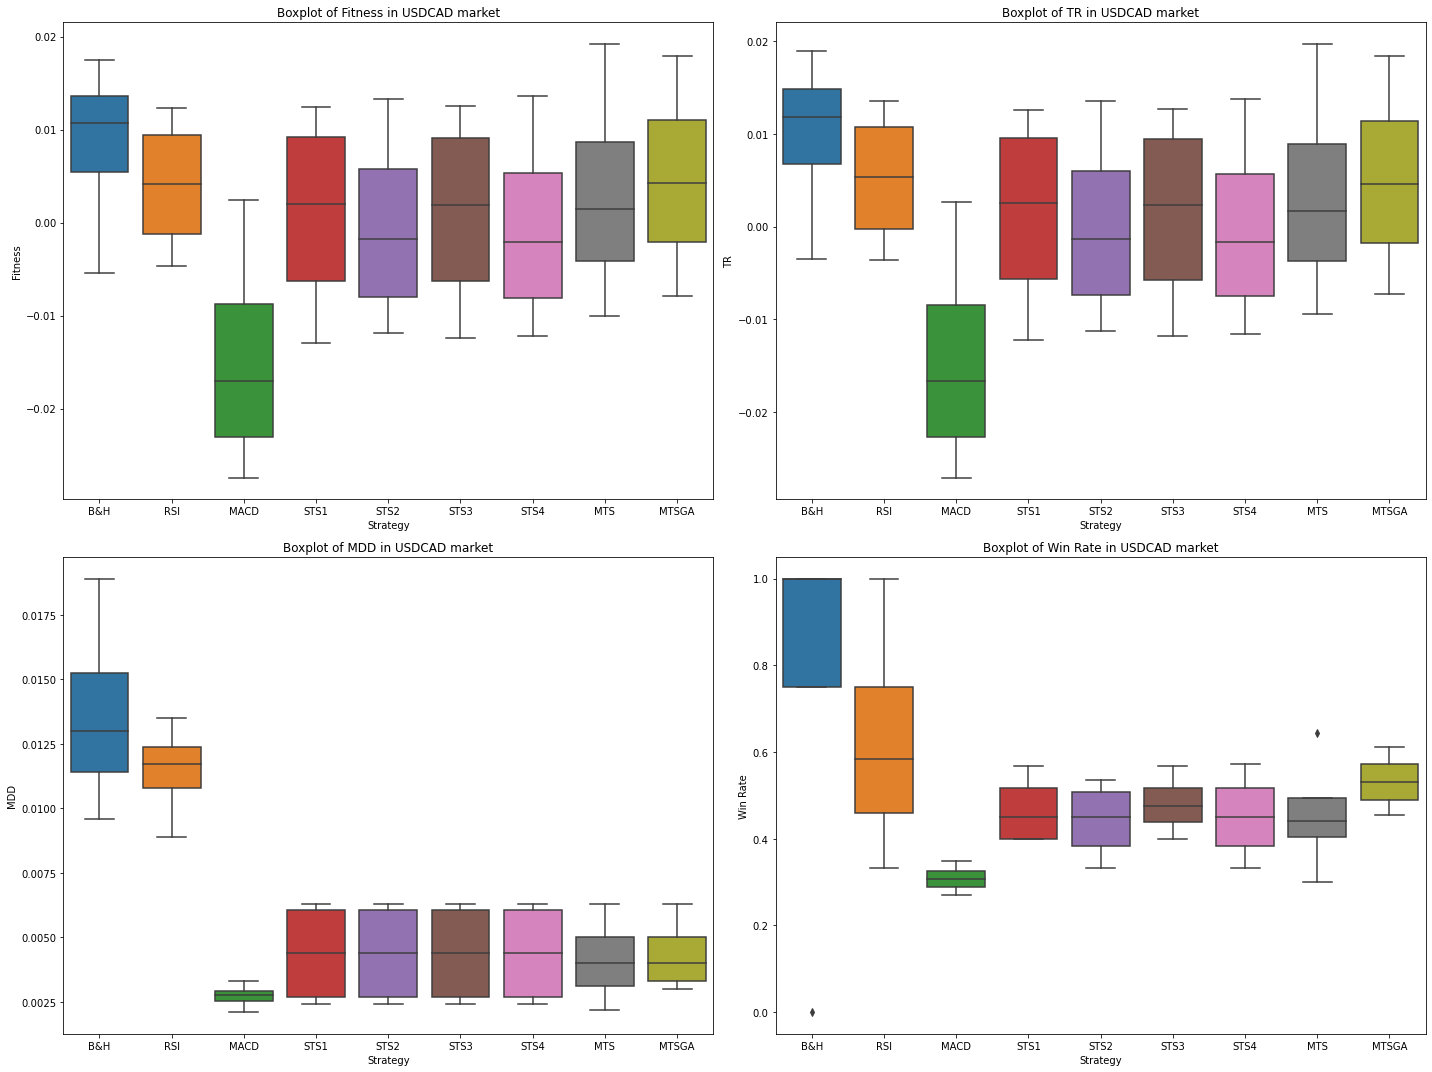

In [35]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Change the 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'], format='%Y%m')

# Descriptive Statistics
desc_stats = data.groupby('Strategy').describe().transpose()

# Plotting Boxplots
plt.figure(figsize=(20, 15))
for i, column in enumerate(['Fitness', 'TR', 'MDD', 'Win Rate'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Strategy', y=column, data=data)
    plt.title(f'Boxplot of {column} in USDCAD market')

plt.tight_layout()
plt.show()



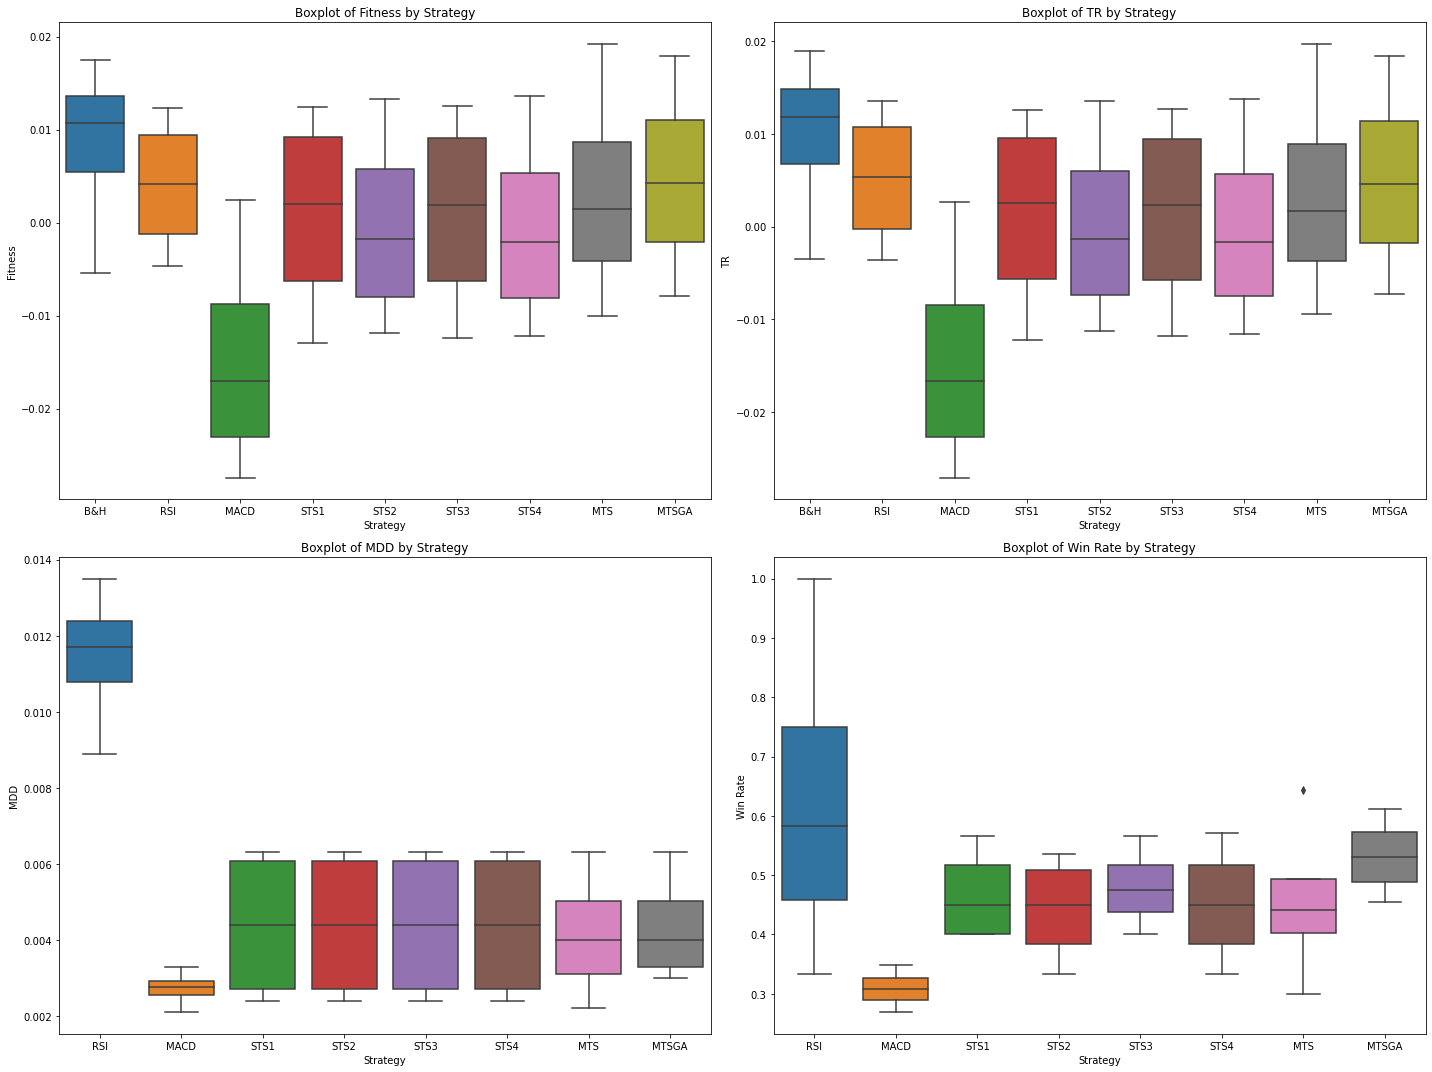

In [36]:

# Plotting Boxplots
plt.figure(figsize=(20, 15))
for i, column in enumerate(['Fitness', 'TR'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Strategy', y=column, data=data)
    plt.title(f'Boxplot of {column} by Strategy')
for i, column in enumerate(['MDD', 'Win Rate'], 1):
    plt.subplot(2, 2, i+2)
    sns.boxplot(x='Strategy', y=column, data=data[data['Strategy']!='B&H'])
    plt.title(f'Boxplot of {column} by Strategy')

plt.tight_layout()
plt.show()

In [37]:
desc_stats

Strategy                  B&H         MACD          MTS        MTSGA  \
Unnamed: 0                                                             
PnL        count     4.000000     4.000000     4.000000     4.000000   
           mean   1306.500000 -1963.500000   454.250000   681.500000   
           std    1285.572894  1739.830164  1690.401210  1517.606559   
           min    -474.000000 -3666.000000 -1296.000000 -1009.000000   
           25%     898.500000 -3076.500000  -522.000000  -240.250000   
           50%    1574.500000 -2256.000000   219.000000   615.000000   
           75%    1982.500000 -1143.000000  1195.250000  1536.750000   
           max    2551.000000   324.000000  2675.000000  2505.000000   
Fitness    count     4.000000     4.000000     4.000000     4.000000   
           mean      0.008375    -0.014750     0.003025     0.004650   
           std       0.009814     0.012995     0.012422     0.011163   
           min      -0.005400    -0.027400    -0.010000    -0.007900   
           25%       0.005475    -0.023050    -0.004150    -0.002125   
           50%       0.010700    -0.017000     0.001450     0.004300   
           75%       0.013600    -0.008700     0.008625     0.011075   
           max       0.017500     0.002400     0.019200     0.017900   
TR         count     4.000000     4.000000     4.000000     4.000000   
           mean      0.009750    -0.014475     0.003425     0.005075   
           std       0.009548     0.012951     0.012399     0.011130   
           min      -0.003500    -0.027100    -0.009400    -0.007300   
           25%       0.006700    -0.022750    -0.003775    -0.001750   
           50%       0.011800    -0.016700     0.001700     0.004600   
           75%       0.014850    -0.008425     0.008900     0.011425   
           max       0.018900     0.002600     0.019700     0.018400   
std(RR)    count     0.000000     4.000000     4.000000     4.000000   
           mean           NaN     0.000700     0.002725     0.002475   
           std            NaN     0.000082     0.001632     0.001466   
           min            NaN     0.000600     0.001200     0.001300   
           25%            NaN     0.000675     0.001650     0.001450   
           50%            NaN     0.000700     0.002400     0.002050   
           75%            NaN     0.000725     0.003475     0.003075   
           max            NaN     0.000800     0.004900     0.004500   
MDD        count     4.000000     4.000000     4.000000     4.000000   
           mean      0.013625     0.002725     0.004125     0.004325   
           std       0.003950     0.000492     0.001750     0.001482   
           min       0.009600     0.002100     0.002200     0.003000   
           25%       0.011400     0.002550     0.003100     0.003300   
           50%       0.013000     0.002750     0.004000     0.004000   
           75%       0.015225     0.002925     0.005025     0.005025   
           max       0.018900     0.003300     0.006300     0.006300   
Win Rate   count     4.000000     4.000000     4.000000     4.000000   
           mean      0.750000     0.308400     0.456200     0.531400   
           std       0.500000     0.033918     0.141120     0.068483   
           min       0.000000     0.269100     0.300000     0.454500   
           25%       0.750000     0.289575     0.403125     0.488625   
           50%       1.000000     0.307750     0.440950     0.530000   
           75%       1.000000     0.326575     0.494025     0.572775   
           max       1.000000     0.349000     0.642900     0.611100   
nTrade     count     4.000000     4.000000     4.000000     4.000000   
           mean      1.000000   304.250000    12.250000    16.500000   
           std       0.000000    44.731607     3.304038     6.454972   
           min       1.000000   255.000000     9.000000    11.000000   
           25%       1.000000   273.750000     9.750000    11.750000   
           50%       1.000000   304.5000

In [38]:
avgdf

,B&H,RSI,MACD,STS1,STS2,STS3,STS4,MTS,MTSGA
Index,,,,,,,,,
PnL,1306.500000,684.250000,-1963.500000,166.750000,-20.000000,172.500000,-42.250000,454.250000,681.500000
Fitness,0.008375,0.003975,-0.014750,0.000900,-0.000525,0.000950,-0.000700,0.003025,0.004650
TR,0.009750,0.005125,-0.014475,0.001325,-0.000100,0.001375,-0.000275,0.003425,0.005075
std(RR),NaN,0.006033,0.000700,0.002175,0.002000,0.002125,0.002000,0.002725,0.002475
MDD,0.013625,0.011450,0.002725,0.004375,0.004375,0.004375,0.004375,0.004125,0.004325
Win Rate,0.750000,0.625000,0.308400,0.466675,0.442250,0.479175,0.451175,0.456200,0.531400
nTrade,1.000000,3.500000,304.250000,23.250000,23.250000,23.250000,23.250000,12.250000,16.500000


# box-plot

In [39]:
# Define a function to analyze a given column
from scipy import stats

def analyze_column(data, column):
    strategies = data['Strategy'].unique()

    # Boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Strategy', y=column, data=data)
    plt.title(f'Boxplot of {column} by Strategy')
    plt.show()

    # ANOVA
    group_data = [data[data['Strategy'] == strategy][column].values for strategy in strategies]
    f_val, p_val = stats.f_oneway(*group_data)
    print(f"ANOVA for {column}: F={f_val}, p={p_val}")

    # Skewness and Kurtosis
    for strategy in strategies:
        skewness = stats.skew(data[data['Strategy'] == strategy][column])
        kurtosis = stats.kurtosis(data[data['Strategy'] == strategy][column])
        print(f"For {strategy}, {column}: skewness={skewness}, kurtosis={kurtosis}")


=== Analysis for Fitness ===


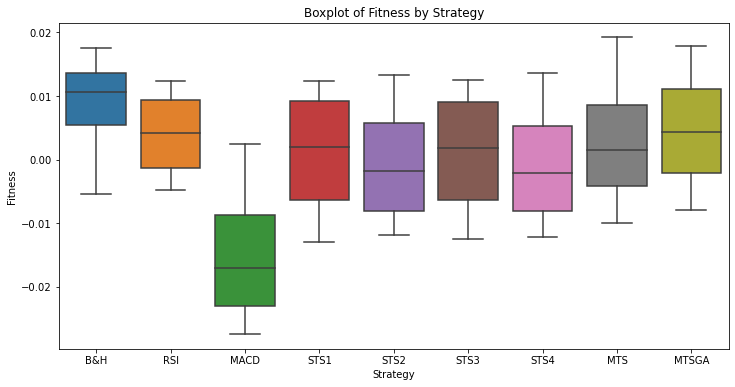

ANOVA for Fitness: F=1.337405735338757, p=0.26795881758475665
For B&H, Fitness: skewness=-0.7301675590116758, kurtosis=-0.9314536635289401
For RSI, Fitness: skewness=-0.046828469177139356, kurtosis=-1.6377786813357482
For MACD, Fitness: skewness=0.4756096757405423, kurtosis=-1.2177307863347675
For STS1, Fitness: skewness=-0.21002269404429094, kurtosis=-1.5764270474640734
For STS2, Fitness: skewness=0.2744848531429844, kurtosis=-1.4170451655549225
For STS3, Fitness: skewness=-0.16502019103265278, kurtosis=-1.603779135828581
For STS4, Fitness: skewness=0.32115559536884525, kurtosis=-1.3576327015917622
For MTS, Fitness: skewness=0.37925002014193865, kurtosis=-1.1705671895632381
For MTSGA, Fitness: skewness=0.08493788680825103, kurtosis=-1.3832371409506359


In [40]:
print(f"\n=== Analysis for Fitness ===")
analyze_column(data, 'Fitness')


=== Analysis for TR ===


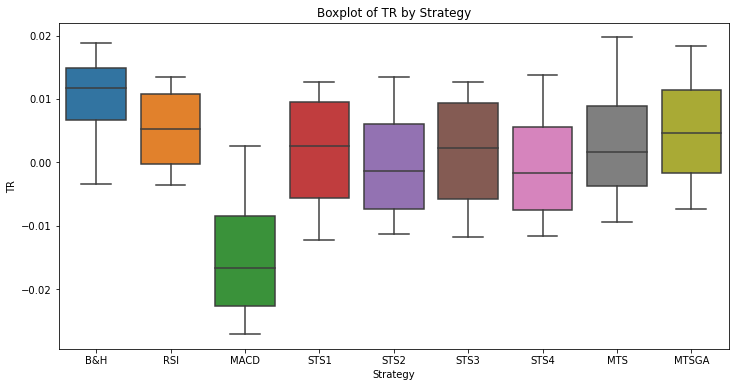

ANOVA for TR: F=1.469147591155579, p=0.21456894653439976
For B&H, TR: skewness=-0.6666285151402577, kurtosis=-0.9659562897286347
For RSI, TR: skewness=-0.04346339292077931, kurtosis=-1.677261450168623
For MACD, TR: skewness=0.47161309952819036, kurtosis=-1.2208275161952402
For STS1, TR: skewness=-0.21994870424314789, kurtosis=-1.5666138864968477
For STS2, TR: skewness=0.27631847884940625, kurtosis=-1.4076347463265058
For STS3, TR: skewness=-0.17396767207269231, kurtosis=-1.5948875651806715
For STS4, TR: skewness=0.32389864947731967, kurtosis=-1.3475441592674753
For MTS, TR: skewness=0.41532521988914434, kurtosis=-1.1567432511994193
For MTSGA, TR: skewness=0.11525611770348167, kurtosis=-1.3824978041364615


In [41]:
print(f"\n=== Analysis for TR ===")
analyze_column(data, 'TR')


=== Analysis for MDD ===


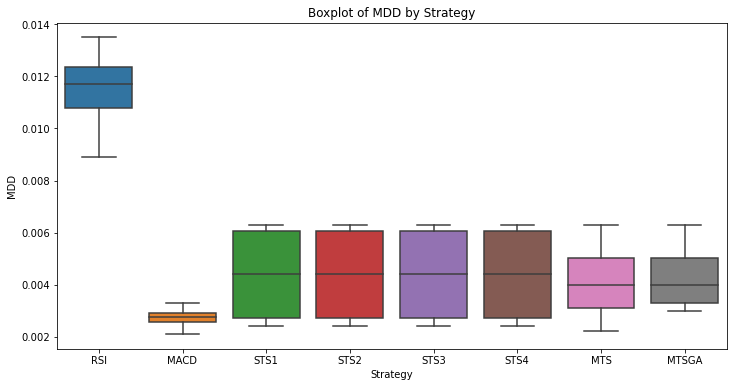

ANOVA for MDD: F=8.666886780852789, p=2.6550584069608408e-05
For RSI, MDD: skewness=-0.4270154806989572, kurtosis=-1.018974575998535
For MACD, MDD: skewness=-0.17284141152939633, kurtosis=-1.0203705671874455
For STS1, MDD: skewness=-0.008209240774217377, kurtosis=-1.9610932530594913
For STS2, MDD: skewness=-0.008209240774217377, kurtosis=-1.9610932530594913
For STS3, MDD: skewness=-0.008209240774217377, kurtosis=-1.9610932530594913
For STS4, MDD: skewness=-0.008209240774217377, kurtosis=-1.9610932530594913
For MTS, MDD: skewness=0.20697081370133033, kurtosis=-1.273304567541302
For MTSGA, MDD: skewness=0.5449485255672679, kurtosis=-1.2454347943498878


In [42]:
print(f"\n=== Analysis for MDD ===")
analyze_column(data[data['Strategy']!='B&H'], 'MDD')


=== Analysis for MDD ===


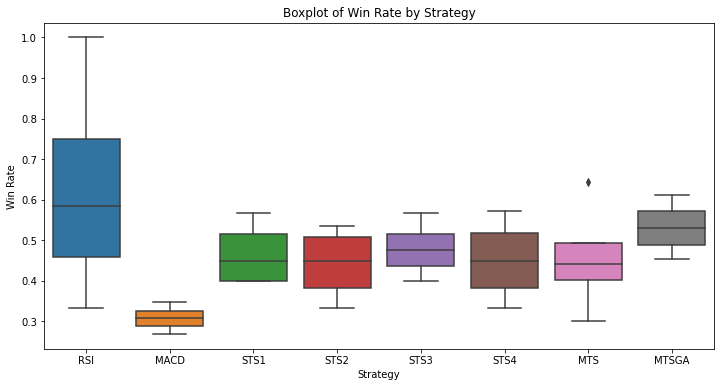

ANOVA for Win Rate: F=1.8297133286529317, p=0.12748296554461225
For RSI, Win Rate: skewness=0.4344520681045402, kurtosis=-1.1543985526239406
For MACD, Win Rate: skewness=0.05644121883929612, kurtosis=-1.2751871184857377
For STS1, Win Rate: skewness=0.31446608597647885, kurtosis=-1.5923457006251671
For STS2, Win Rate: skewness=-0.17450946288457725, kurtosis=-1.600699955314405
For STS3, Win Rate: skewness=0.16878553006914293, kurtosis=-1.2910312752629143
For STS4, Win Rate: skewness=0.02702267158244104, kurtosis=-1.509342982893958
For MTS, Win Rate: skewness=0.36821875183653435, kurtosis=-0.971154599619056
For MTSGA, Win Rate: skewness=0.05265763104314161, kurtosis=-1.4448725294327043


In [43]:
print(f"\n=== Analysis for MDD ===")
analyze_column(data[data['Strategy']!='B&H'], 'Win Rate')

# Avg, Skewness, and Kurtosis

## PnL

In [44]:
avgdf

,B&H,RSI,MACD,STS1,STS2,STS3,STS4,MTS,MTSGA
Index,,,,,,,,,
PnL,1306.500000,684.250000,-1963.500000,166.750000,-20.000000,172.500000,-42.250000,454.250000,681.500000
Fitness,0.008375,0.003975,-0.014750,0.000900,-0.000525,0.000950,-0.000700,0.003025,0.004650
TR,0.009750,0.005125,-0.014475,0.001325,-0.000100,0.001375,-0.000275,0.003425,0.005075
std(RR),NaN,0.006033,0.000700,0.002175,0.002000,0.002125,0.002000,0.002725,0.002475
MDD,0.013625,0.011450,0.002725,0.004375,0.004375,0.004375,0.004375,0.004125,0.004325
Win Rate,0.750000,0.625000,0.308400,0.466675,0.442250,0.479175,0.451175,0.456200,0.531400
nTrade,1.000000,3.500000,304.250000,23.250000,23.250000,23.250000,23.250000,12.250000,16.500000


In [45]:
unique_strategies = data['Strategy'].unique()

# Calculate skewness and kurtosis for PnL for each strategy
skewness_kurtosis = {strategy: {"skewness": stats.skew(data[data['Strategy'] == strategy]['PnL']),
                                 "kurtosis": stats.kurtosis(data[data['Strategy'] == strategy]['PnL'])} 
                     for strategy in unique_strategies}
skewness_kurtosis


{'B&H': {'skewness': -0.6524922854558067, 'kurtosis': -0.9652691375648206},
 'RSI': {'skewness': -0.05910262575098631, 'kurtosis': -1.675058355952069},
 'MACD': {'skewness': 0.46055088297433605, 'kurtosis': -1.2295695453592654},
 'STS1': {'skewness': -0.2219977019042218, 'kurtosis': -1.5541186772586117},
 'STS2': {'skewness': 0.2782059942844721, 'kurtosis': -1.3979722274963042},
 'STS3': {'skewness': -0.1756563396749949, 'kurtosis': -1.5784391120887495},
 'STS4': {'skewness': 0.3287912544645588, 'kurtosis': -1.3345570438422198},
 'MTS': {'skewness': 0.41716438486153457, 'kurtosis': -1.1505938889568734},
 'MTSGA': {'skewness': 0.11987462745847312, 'kurtosis': -1.3661249360645868}}

1. Profitability: The MTSGA strategy shows a positive average PnL, suggesting that it has been profitable on average during the period covered by the data.


2. Risk and Return Distribution: The positive skewness indicates that the MTSGA strategy has a distribution with a long tail in the positive direction. This can be interpreted as the strategy having a tendency for exceptionally good outcomes, albeit rarely. The positive kurtosis suggests that the PnL distribution for MTSGA has heavier tails and a sharper peak than a normal distribution, meaning that while most results will be close to the average, extreme outcomes (both good and bad) are more likely than they would be in a normally distributed scenario.


3. Comparison with Other Strategies: While the ANOVA test did not find significant evidence to suggest that the average PnL differs between strategies, the p-value was close to the threshold, indicating that there might be some differences between strategies. Further investigation or testing with a larger dataset might provide more definitive insights.

# PnL
## Hist

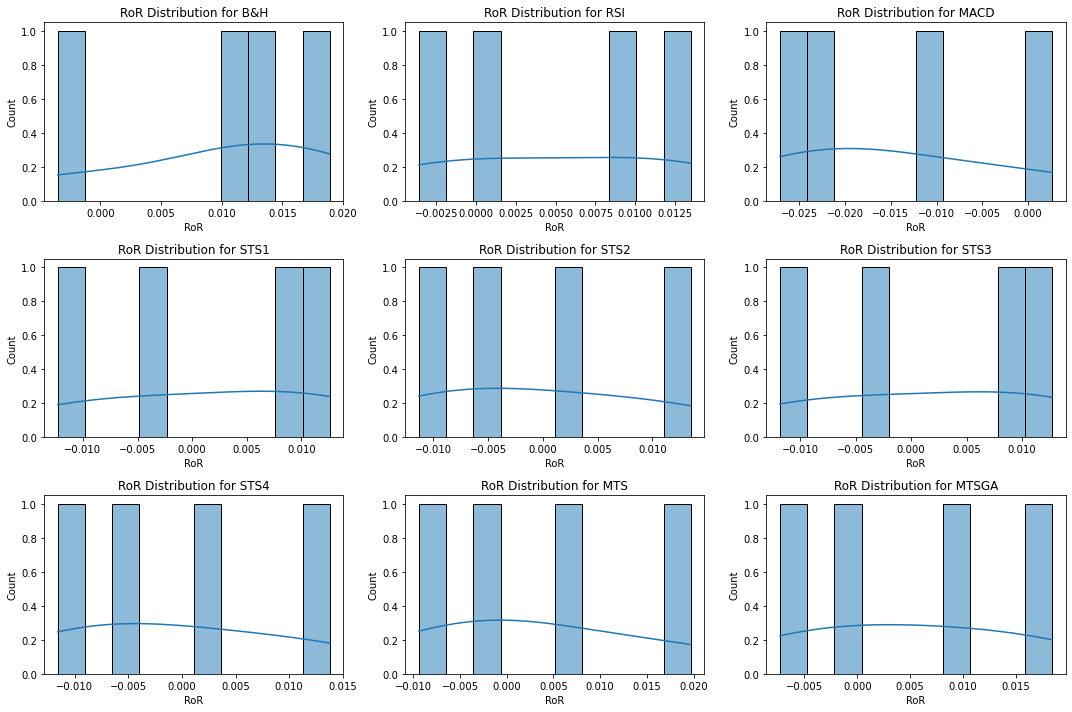

In [46]:
# Create histograms for PnL of each strategy
plt.figure(figsize=(15, 10))

for i, strategy in enumerate(unique_strategies, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[data['Strategy'] == strategy]['TR'], bins=10, kde=True)
    plt.title(f'RoR Distribution for {strategy}')
    plt.xlabel('RoR')

plt.tight_layout()
plt.show()

These histograms represent the distribution of the Profit and Loss (PnL) for each strategy. The y-axis shows the frequency (number of occurrences), and the x-axis shows the range of PnL values. The blue line (Kernel Density Estimate) gives an indication of the shape of the distribution.

Looking at the histogram for the MTSGA strategy, you can see that the PnL values are distributed mostly on the positive side, which is consistent with our previous finding that the MTSGA strategy has a positive average PnL. However, there is also a noticeable spread in the PnL values, indicating variability in the performance of this strategy.

From the plots, it is also visible that none of the strategies have a perfectly normal distribution of PnL values. This is especially important as our previous statistical tests (ANOVA and Tukey's HSD) assumed normality. The fact that our data do not perfectly meet this assumption doesn't invalidate our results, but it does mean we should be cautious in our interpretation.

In [47]:
kruskal_result = stats.kruskal(*[data[data['Strategy'] == strategy]['PnL'] for strategy in unique_strategies])
kruskal_result

KruskalResult(statistic=8.734232204916982, pvalue=0.3652095457916342)

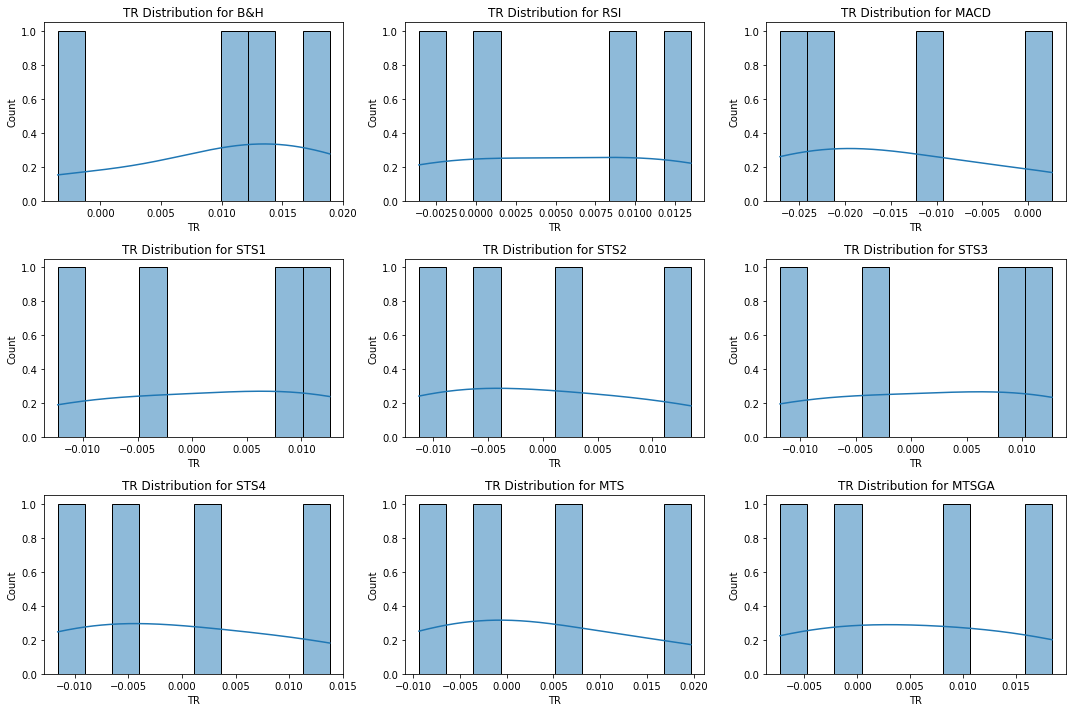

In [48]:
# Create histograms for PnL of each strategy
plt.figure(figsize=(15, 10))

for i, strategy in enumerate(unique_strategies, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[data['Strategy'] == strategy]['TR'], bins=10, kde=True)
    plt.title(f'TR Distribution for {strategy}')

plt.tight_layout()
plt.show()

In [49]:
# Check if the assumptions of normality and homogeneity of variances are met for 'TR'

# Normality
print("Shapiro-Wilk Test for Normality:")
for strategy in unique_strategies:
    _, p = stats.shapiro(data[data['Strategy'] == strategy]['TR'])
    print(f"{strategy}: p-value = {p}")

# Homogeneity of variances
_, p = stats.levene(*[data[data['Strategy'] == strategy]['TR'] for strategy in unique_strategies])
print(f"\nLevene's Test for Homogeneity of Variances: p-value = {p}")

Shapiro-Wilk Test for Normality:
B&H: p-value = 0.6030856370925903
RSI: p-value = 0.6518702507019043
MACD: p-value = 0.7590550184249878
STS1: p-value = 0.6681405305862427
STS2: p-value = 0.8225701451301575
STS3: p-value = 0.6822003126144409
STS4: p-value = 0.8325706124305725
MTS: p-value = 0.8671014308929443
MTSGA: p-value = 0.9456801414489746

Levene's Test for Homogeneity of Variances: p-value = 0.9891432675404126


In [50]:
kruskal_result = stats.kruskal(*[data[data['Strategy'] == strategy]['TR'] for strategy in unique_strategies])
kruskal_result

KruskalResult(statistic=8.774790727623959, pvalue=0.36164923260083576)

In [51]:
# Perform ANOVA for 'TR'
anova_result = stats.f_oneway(*[data[data['Strategy'] == strategy]['TR'] for strategy in unique_strategies])

anova_result


F_onewayResult(statistic=1.469147591155579, pvalue=0.21456894653439976)

In [52]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test for 'TR'
tukey_result = pairwise_tukeyhsd(endog=data['TR'], groups=data['Strategy'], alpha=0.1)

# Convert the result to a DataFrame
tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])

# Display the results
tukey_df.sort_values(by='p-adj')


,group1,group2,meandiff,p-adj,lower,upper,reject
0,B&H,MACD,-0.0242,0.0879,-0.0480,-0.0005,True
10,MACD,RSI,0.0196,0.2707,-0.0041,0.0433,False
9,MACD,MTSGA,0.0195,0.2736,-0.0042,0.0433,False
8,MACD,MTS,0.0179,0.3819,-0.0058,0.0416,False
13,MACD,STS3,0.0158,0.5326,-0.0079,0.0396,False
11,MACD,STS1,0.0158,0.5361,-0.0079,0.0395,False
12,MACD,STS2,0.0144,0.6374,-0.0094,0.0381,False
14,MACD,STS4,0.0142,0.6499,-0.0095,0.0379,False
23,MTSGA,STS2,-0.0052,0.9000,-0.0289,0.0186,False
24,MTSGA,STS3,-0.0037,0.9000,-0.0274,0.0200,False


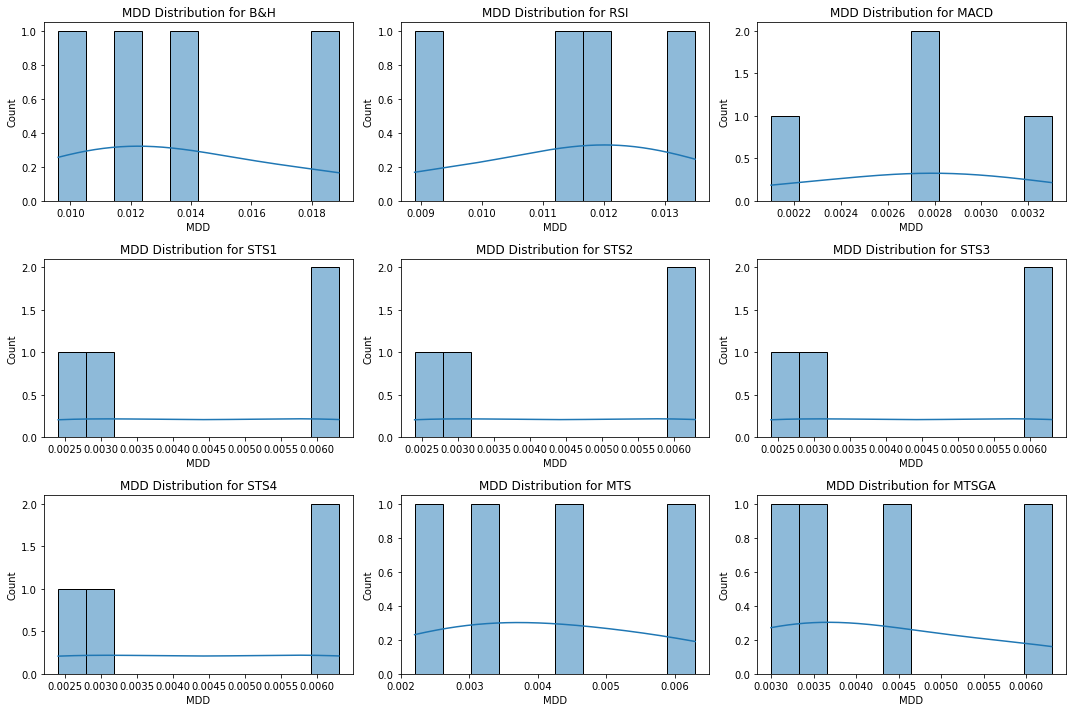

In [53]:
# Create histograms for PnL of each strategy
plt.figure(figsize=(15, 10))

for i, strategy in enumerate(unique_strategies, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[data['Strategy'] == strategy]['MDD'], bins=10, kde=True)
    plt.title(f'MDD Distribution for {strategy}')

plt.tight_layout()
plt.show()

In [54]:
# Check if the assumptions of normality and homogeneity of variances are met for 'MDD'

# Normality
print("Shapiro-Wilk Test for Normality:")
for strategy in unique_strategies:
    _, p = stats.shapiro(data[data['Strategy'] == strategy]['MDD'])
    print(f"{strategy}: p-value = {p}")

# Homogeneity of variances
_, p = stats.levene(*[data[data['Strategy'] == strategy]['MDD'] for strategy in unique_strategies])
print(f"\nLevene's Test for Homogeneity of Variances: p-value = {p}")

Shapiro-Wilk Test for Normality:
B&H: p-value = 0.816476047039032
RSI: p-value = 0.8165101408958435
MACD: p-value = 0.8600770831108093
STS1: p-value = 0.12326737493276596
STS2: p-value = 0.12326737493276596
STS3: p-value = 0.12326737493276596
STS4: p-value = 0.12326737493276596
MTS: p-value = 0.9624327421188354
MTSGA: p-value = 0.5614068508148193

Levene's Test for Homogeneity of Variances: p-value = 0.10428814489042923


In [55]:
kruskal_result = stats.kruskal(*[data[data['Strategy'] == strategy]['MDD'] for strategy in unique_strategies])
kruskal_result

KruskalResult(statistic=20.42576703068123, pvalue=0.00883983219174171)

## Kruskal-Wallis

In [56]:
# Perform Kruskal-Wallis test
kruskal_result = stats.kruskal(*[data[data['Strategy'] == strategy]['PnL'] for strategy in unique_strategies])

kruskal_result

KruskalResult(statistic=8.734232204916982, pvalue=0.3652095457916342)

## M-W U Test

The Mann-Whitney U test is a non-parametric test that can be used to compare two independent samples. However, please note that performing multiple tests increases the likelihood of Type I errors (false positives), so a correction method such as the Bonferroni correction is usually applied to control the family-wise error rate.

In [57]:
from scipy.stats import mannwhitneyu
from itertools import combinations

# Get all combinations of strategies
strategy_combinations = list(combinations(unique_strategies, 2))

# Initialize an empty DataFrame to store the results
mann_whitney_results = pd.DataFrame(columns=['Group1', 'Group2', 'Statistic', 'p-value'])

# Perform Mann-Whitney U test for each pair of strategies
for group1, group2 in strategy_combinations:
    stat, p = mannwhitneyu(data[data['Strategy'] == group1]['TR'], 
                           data[data['Strategy'] == group2]['TR'],
                           alternative='two-sided')
    temp_df = pd.DataFrame({'Group1': [group1], 
                            'Group2': [group2], 
                            'Statistic': [stat], 
                            'p-value': [p]})
    mann_whitney_results = pd.concat([mann_whitney_results, temp_df])

# Apply Bonferroni correction
mann_whitney_results['p-value'] *= len(strategy_combinations)
mann_whitney_results['p-value'] = mann_whitney_results['p-value'].clip(upper=1)

# Display the results
mann_whitney_results.sort_values(by='p-value')

,Group1,Group2,Statistic,p-value
0,B&H,RSI,11.5,1.0
0,MACD,MTSGA,2.0,1.0
0,STS1,STS2,8.0,1.0
0,STS1,STS3,8.0,1.0
0,STS1,STS4,8.0,1.0
0,STS1,MTS,7.0,1.0
0,STS1,MTSGA,6.0,1.0
0,MACD,MTS,2.0,1.0
0,STS2,STS3,8.0,1.0
0,STS2,MTS,6.0,1.0


In [58]:
from scipy.stats import mannwhitneyu
from itertools import combinations

# Get all combinations of strategies
strategy_combinations = list(combinations(unique_strategies, 2))

# Initialize an empty DataFrame to store the results
mann_whitney_results = pd.DataFrame(columns=['Group1', 'Group2', 'Statistic', 'p-value'])

# Perform Mann-Whitney U test for each pair of strategies
for group1, group2 in strategy_combinations:
    stat, p = mannwhitneyu(data[data['Strategy'] == group1]['TR'], 
                           data[data['Strategy'] == group2]['TR'],
                           alternative='two-sided')
    temp_df = pd.DataFrame({'Group1': [group1], 
                            'Group2': [group2], 
                            'Statistic': [stat], 
                            'p-value': [p]})
    mann_whitney_results = pd.concat([mann_whitney_results, temp_df])

# Apply Bonferroni correction
mann_whitney_results['p-value'] *= len(strategy_combinations)
mann_whitney_results['p-value'] = mann_whitney_results['p-value'].clip(upper=1)

# Display the results
mann_whitney_results.sort_values(by='p-value')

,Group1,Group2,Statistic,p-value
0,B&H,RSI,11.5,1.0
0,MACD,MTSGA,2.0,1.0
0,STS1,STS2,8.0,1.0
0,STS1,STS3,8.0,1.0
0,STS1,STS4,8.0,1.0
0,STS1,MTS,7.0,1.0
0,STS1,MTSGA,6.0,1.0
0,MACD,MTS,2.0,1.0
0,STS2,STS3,8.0,1.0
0,STS2,MTS,6.0,1.0


# Total Return (RoR)

In [59]:
# Check if the assumptions of normality and homogeneity of variances are met for 'TR'

# Normality
print("Shapiro-Wilk Test for Normality:")
for strategy in unique_strategies:
    _, p = stats.shapiro(data[data['Strategy'] == strategy]['TR'])
    print(f"{strategy}: p-value = {p}")

# Homogeneity of variances
_, p = stats.levene(*[data[data['Strategy'] == strategy]['TR'] for strategy in unique_strategies])
print(f"\nLevene's Test for Homogeneity of Variances: p-value = {p}")


Shapiro-Wilk Test for Normality:
B&H: p-value = 0.6030856370925903
RSI: p-value = 0.6518702507019043
MACD: p-value = 0.7590550184249878
STS1: p-value = 0.6681405305862427
STS2: p-value = 0.8225701451301575
STS3: p-value = 0.6822003126144409
STS4: p-value = 0.8325706124305725
MTS: p-value = 0.8671014308929443
MTSGA: p-value = 0.9456801414489746

Levene's Test for Homogeneity of Variances: p-value = 0.9891432675404126


## ANOVA

In [60]:
# Perform ANOVA for 'TR'
anova_result = stats.f_oneway(*[data[data['Strategy'] == strategy]['TR'] for strategy in unique_strategies])

anova_result

F_onewayResult(statistic=1.469147591155579, pvalue=0.21456894653439976)

# MDD

In [61]:
# Check if the assumptions of normality and homogeneity of variances are met for 'MDD'

# Normality
print("Shapiro-Wilk Test for Normality:")
for strategy in unique_strategies:
    _, p = stats.shapiro(data[data['Strategy'] == strategy]['MDD'])
    print(f"{strategy}: p-value = {p}")

# Homogeneity of variances
_, p = stats.levene(*[data[data['Strategy'] == strategy]['MDD'] for strategy in unique_strategies])
print(f"\nLevene's Test for Homogeneity of Variances: p-value = {p}")


Shapiro-Wilk Test for Normality:
B&H: p-value = 0.816476047039032
RSI: p-value = 0.8165101408958435
MACD: p-value = 0.8600770831108093
STS1: p-value = 0.12326737493276596
STS2: p-value = 0.12326737493276596
STS3: p-value = 0.12326737493276596
STS4: p-value = 0.12326737493276596
MTS: p-value = 0.9624327421188354
MTSGA: p-value = 0.5614068508148193

Levene's Test for Homogeneity of Variances: p-value = 0.10428814489042923


In [62]:
# Perform Kruskal-Wallis test for 'MDD'
kruskal_result = stats.kruskal(*[data[data['Strategy'] == strategy]['MDD'] for strategy in unique_strategies])

kruskal_result

KruskalResult(statistic=20.42576703068123, pvalue=0.00883983219174171)

In [63]:
# Initialize an empty DataFrame to store the results
mann_whitney_results = pd.DataFrame(columns=['Group1', 'Group2', 'Statistic', 'p-value'])

# Perform Mann-Whitney U test for each pair of strategies
for group1, group2 in strategy_combinations:
    stat, p = mannwhitneyu(data[data['Strategy'] == group1]['MDD'], 
                           data[data['Strategy'] == group2]['MDD'],
                           alternative='two-sided')
    temp_df = pd.DataFrame({'Group1': [group1], 
                            'Group2': [group2], 
                            'Statistic': [stat], 
                            'p-value': [p]})
    mann_whitney_results = pd.concat([mann_whitney_results, temp_df])

# Apply Bonferroni correction
mann_whitney_results['p-value'] *= len(strategy_combinations)
mann_whitney_results['p-value'] = mann_whitney_results['p-value'].clip(upper=1)

# Display the results
mann_whitney_results.sort_values(by='p-value')


,Group1,Group2,Statistic,p-value
0,B&H,RSI,11.5,1.0
0,MACD,MTSGA,1.0,1.0
0,STS1,STS2,8.0,1.0
0,STS1,STS3,8.0,1.0
0,STS1,STS4,8.0,1.0
0,STS1,MTS,8.5,1.0
0,STS1,MTSGA,6.5,1.0
0,MACD,MTS,3.0,1.0
0,STS2,STS3,8.0,1.0
0,STS2,MTS,8.5,1.0


In [64]:
mann_whitney_results[mann_whitney_results['Group2']=='MTSGA']

,Group1,Group2,Statistic,p-value
0,B&H,MTSGA,16.0,1.0
0,RSI,MTSGA,16.0,1.0
0,MACD,MTSGA,1.0,1.0
0,STS1,MTSGA,6.5,1.0
0,STS2,MTSGA,6.5,1.0
0,STS3,MTSGA,6.5,1.0
0,STS4,MTSGA,6.5,1.0
0,MTS,MTSGA,7.5,1.0
